In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file = 'iris.xlsx'
df = pd.read_excel (file) 
iris_df = pd.DataFrame(df,columns = ['sepal_length','sepal_width','petal_length','petal_width','label'])

In [3]:
def standardize(col):
    return (col-col.mean())/col.std()

In [30]:
def is_setosa(row):
    return row['label'] == 'setosa'  # boolean array of T/F

In [36]:
setosa = iris_df.apply(is_setosa,axis = 1).astype(int) # makes it into 1s and 0s

In [37]:
def is_virgi(row):
    return row['label'] == 'virginica'
def is_versi(row):
    return row['label'] == 'versicolor' 
virgi = iris_df.apply(is_virgi,axis = 1).astype(int)
versi = iris_df.apply(is_versi,axis = 1).astype(int)

In [38]:
Target = pd.DataFrame({'setosa':setosa,'virginica':virgi,'versicolor':versi})

In [39]:
Target.head()

,setosa,virginica,versicolor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [124]:
Target['label'] = Target.apply(make_label,axis = 1)

In [46]:
X = iris_df[['petal_length','petal_width']].values
X  = np.hstack([X,np.ones((X.shape[0],1))]) # 150 by 3 now


In [47]:
W = np.matmul(np.linalg.pinv(X),Target.values)

In [48]:
W

array([[-0.25132905, -0.07300611,  0.32433516],
       [ 0.00983426,  0.64025527, -0.65008953],
       [ 1.26603335, -0.16018919, -0.10584416]])

In [49]:
res = np.dot(X,W) # preds


In [53]:
Results = pd.DataFrame(res,columns=['setosa','virginica','versicolor'])

In [58]:
def make_array(r):
    max = r.max()
    return pd.Series(r == max).astype(int)
Results = Results.apply(make_array,axis=1) # makes it into an arra of 1s and 0s with 1 being assigned to the highest value in row else 0

In [59]:
def make_label(r):
    if r['setosa'] == 1:
        return 1
    elif r['virginica'] == 1:
        return 2
    else:
        return 3

In [60]:
Results['label'] = Results.apply(make_label,axis = 1)

In [125]:
(Results['label'] == Target['label']).sum()

116

In [67]:
Results['label'].value_counts()

2    59
1    55
3    36
Name: label, dtype: int64

In [105]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
xx2,yy2 = make_meshgrid(X[:,0],X[:,1])
xx = np.reshape(xx2,(xx2.ravel().shape[0],1))
yy = np.reshape(yy2,(yy2.ravel().shape[0],1))
X_mesh = np.hstack([xx,yy,np.ones((xx.shape[0]*xx.shape[1],1))]) #86200 by 3 now
clf = np.dot(X_mesh,W)

In [106]:
Clf = pd.DataFrame(clf,columns=['setosa','virginica','versicolor'])
Clf = Clf.apply(make_array,axis=1)
Clf['label'] = Clf.apply(make_label,axis = 1)

In [112]:
Clf.shape

(86900, 4)

In [113]:
Y = np.array(Clf['label']) # Needed to make an ndarray otherwise .reshape wasnt working and np.reshape was giving error
Z = Y.reshape(xx2.shape) # Z needed to be a 2D array for contourf func


In [117]:
xx.shape
# xx = np.reshape(xx,xx.ravel().shape)
# yy = np.reshape(yy,yy.ravel().shape)
# print(xx.shape)
# print(yy.shape)

(86900, 1)

In [119]:
labels = iris_df['label'].replace({'setosa':1,'virginica':2,'versicolor':3})

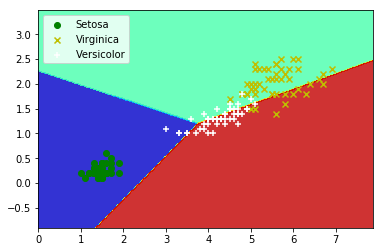

In [123]:
plt.contourf(xx2, yy2, Z, cmap=plt.cm.jet, alpha=.8) # xx2 and yy2 needed to be 1D i.e. (86200,)
plt.scatter(X[labels == 1,0],X[labels == 1,1],c='g',marker='o',label = 'Setosa')
plt.scatter(X[labels == 2,0],X[labels == 2,1],c='y',marker='x',label='Virginica')
plt.scatter(X[labels == 3,0],X[labels == 3,1],c='w',marker='+',label='Versicolor') # Needed to add label arg so that when calling plt.legend() it knows which symbolto attach to which text
plt.legend()

In [97]:
xx = np.reshape(xx,xx.ravel().shape)
xx.shape

(86900,)